solution:
4.505231 x + 2.147110 y + 6.288009 = z
errors:
[[-3.53932303]
 [-3.34341543]
 [ 0.76639355]
 [ 0.28366967]
 [-4.13146684]
 [-1.88109955]
 [ 6.05201178]
 [ 3.44039314]
 [-2.97041703]
 [ 5.32325373]]
residual:
11.428218357


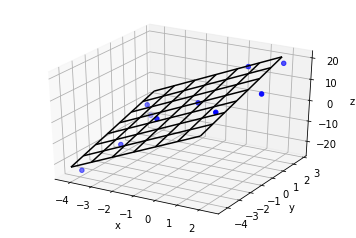

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

N_POINTS = 10
TARGET_X_SLOPE = 2
TARGET_y_SLOPE = 3
TARGET_OFFSET  = 5
EXTENTS = 5
NOISE = 5

# create random data
xs = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
ys = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
zs = []
for i in range(N_POINTS):
    zs.append(xs[i]*TARGET_X_SLOPE + \
              ys[i]*TARGET_y_SLOPE + \
              TARGET_OFFSET + np.random.normal(scale=NOISE))

# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print "solution:"
print "%f x + %f y + %f = z" % (fit[0], fit[1], fit[2])
print "errors:"
print errors
print "residual:"
print residual

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

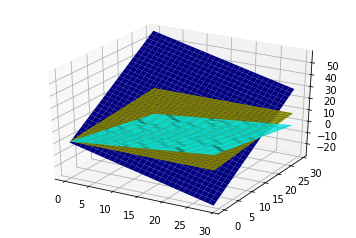

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point1  = np.array([0,0,0])
normal1 = np.array([1,-2,1])

point2  = np.array([0,-4,0])
normal2 = np.array([0,2,-8])

point3  = np.array([0,0,1])
normal3 = np.array([-4,5,9])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d1 = -np.sum(point1*normal1)# dot product
d2 = -np.sum(point2*normal2)# dot product
d3 = -np.sum(point3*normal3)# dot product

# create x,y
xx, yy = np.meshgrid(range(30), range(30))

# calculate corresponding z
z1 = (-normal1[0]*xx - normal1[1]*yy - d1)*1./normal1[2]
z2 = (-normal2[0]*xx - normal2[1]*yy - d2)*1./normal2[2]
z3 = (-normal3[0]*xx - normal3[1]*yy - d3)*1./normal3[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx,yy,z1, color='blue')
plt3d.plot_surface(xx,yy,z2, color='yellow')
plt3d.plot_surface(xx,yy,z3, color='cyan')
plt.show()

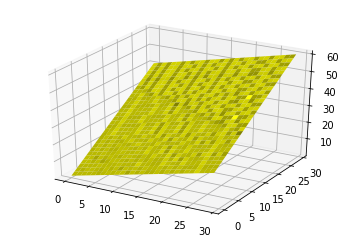

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fx = 0.662916
fy = 1.404379
fc = 0.607921
        
# create x,y
xx, yy = np.meshgrid(range(30), range(30))
zz = fx*xx+fy*yy+fc

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx,yy,zz, color='yellow')
plt.show()